In [1]:
import pandas as pd
from great_expectations.data_context import FileDataContext
import os

print(os.getcwd())
# leave to the directory one level up
os.chdir("../")

print(os.getcwd())

C:\Users\sasha\PycharmProjects\Sum2024MLOps\notebooks
C:\Users\sasha\PycharmProjects\Sum2024MLOps


In [2]:
relative_path = 'data/samples/sample.csv'
df = pd.read_csv(relative_path)

In [4]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,13979008,3696,https://www.zameen.com/Property/chinar_bagh_ch...,House,13000000,Chinar Bagh,Lahore,Punjab,31.321454,74.239497,0,1 Kanal,For Sale,6,01-03-2019,Niazi Real Estate & Marketing,Agha Mansoor Ali Khan Niazi,Kanal,1.0,1-5 Kanal
1,14053499,1451,https://www.zameen.com/Property/dha_defence_dh...,House,46000000,DHA Defence,Lahore,Punjab,31.494408,74.437666,7,1 Kanal,For Sale,6,01-03-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
2,14117380,756,https://www.zameen.com/Property/lahore_bor_boa...,House,7500000,BOR - Board of Revenue Housing Society,Lahore,Punjab,31.478452,74.296846,4,3 Marla,For Sale,4,01-03-2019,NaN,NaN,Marla,3.0,0-5 Marla
3,14052338,69,https://www.zameen.com/Property/lahore_cavalry...,House,12500000,Cavalry Ground,Lahore,Punjab,31.492705,74.367093,3,5 Marla,For Sale,3,01-03-2019,NaN,NaN,Marla,5.0,0-5 Marla
4,14034663,1553,https://www.zameen.com/Property/model_town_mod...,House,65000000,Model Town,Lahore,Punjab,31.476915,74.324641,0,1 Kanal,For Sale,4,01-03-2019,NaN,NaN,Kanal,1.0,1-5 Kanal


<Axes: >

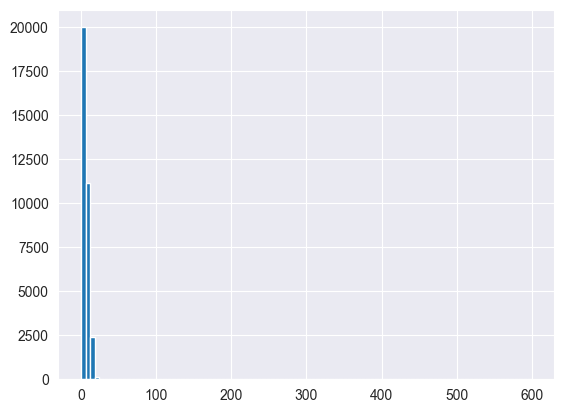

In [5]:
df['Area Size'].hist(bins=100)

In [6]:
# calculate mean and max of the price
min_price = df['price'].min()
price_25 = df['price'].quantile(0.25)
mean_price = df['price'].mean()
median_price = df['price'].median()
price_75 = df['price'].quantile(0.75)
max_price = df['price'].max()
std_dev_price = df['price'].std()
mean_price, min_price, price_25, median_price, price_75, max_price, std_dev_price

(np.float64(18690692.356377453),
 np.int64(0),
 np.float64(120000.0),
 np.float64(8000000.0),
 np.float64(19800000.0),
 np.int64(1450000000),
 np.float64(40341490.52211307))

In [7]:
min_area = df['Area Size'].min()
max_area = df['Area Size'].max()
print(round(min_area, 5), max_area)

0.0 600.0


In [8]:
min_baths = df['baths'].min()
max_baths = df['baths'].max()
min_bedrooms = df['bedrooms'].min()
max_bedrooms = df['bedrooms'].max()
min_baths, max_baths, min_bedrooms, max_bedrooms

(np.int64(0), np.int64(10), np.int64(0), np.int64(18))

In [9]:
# count number of 0 in Area Size
df[df['Area Size'] == 0]


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
27744,13935017,476,https://www.zameen.com/Property/karachi_malir_...,House,4400000,Malir,Karachi,Sindh,24.893209,67.195473,2,0 Marla,For Sale,2,05-05-2019,Infinity Properties,Shehzad,Marla,0.0,0-5 Marla


In [10]:
# count percentage of Null values in agency
df['agency'].isnull().sum() / len(df) * 100, df['agent'].isnull().sum() / len(df) * 100

(np.float64(43.560212532280566), np.float64(43.560212532280566))

<Axes: ylabel='Frequency'>

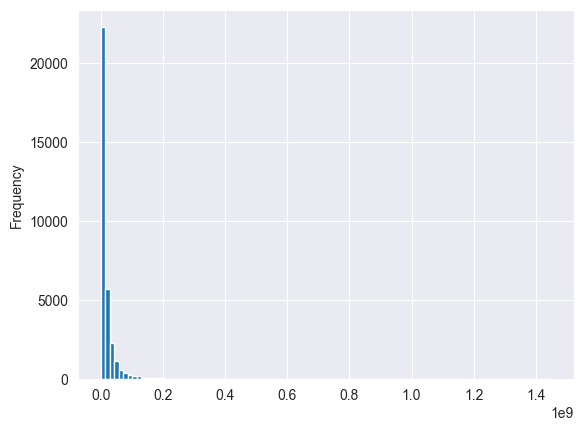

In [11]:
# plot the price distribution
df['price'].plot.hist(bins=100)

In [12]:
# count number of price == 0
df[df['price'] == 0]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
33306,16081186,8129,https://www.zameen.com/Property/rawalpindi_ran...,House,0,Range Road,Rawalpindi,Punjab,33.598593,73.018003,0,5 Marla,For Rent,0,05-06-2019,NaN,NaN,Marla,5.0,0-5 Marla


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33689 entries, 0 to 33688
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    33689 non-null  int64  
 1   location_id    33689 non-null  int64  
 2   page_url       33689 non-null  object 
 3   property_type  33689 non-null  object 
 4   price          33689 non-null  int64  
 5   location       33689 non-null  object 
 6   city           33689 non-null  object 
 7   province_name  33689 non-null  object 
 8   latitude       33689 non-null  float64
 9   longitude      33689 non-null  float64
 10  baths          33689 non-null  int64  
 11  area           33689 non-null  object 
 12  purpose        33689 non-null  object 
 13  bedrooms       33689 non-null  int64  
 14  date_added     33689 non-null  object 
 15  agency         19014 non-null  object 
 16  agent          19014 non-null  object 
 17  Area Type      33689 non-null  object 
 18  Area S

In [14]:
# find distinct property types
df['property_type'].unique()

array(['House', 'Penthouse', 'Flat', 'Farm House', 'Upper Portion',
       'Lower Portion', 'Room'], dtype=object)

In [15]:
df['agency'].unique()

array(['Niazi Real Estate & Marketing', nan, 'A One Estate & Builders',
       ..., 'Al-Nasir Builder/Developer & Real Estate Services',
       'Estate 1. com', 'Unique Real Estate'], dtype=object)

In [16]:
df.nunique()

property_id      33689
location_id       3103
page_url         33689
property_type        7
price             1094
location          1202
city                 5
province_name        3
latitude          3688
longitude         3926
baths               11
area               271
purpose              2
bedrooms            17
date_added          39
agency            2670
agent             3912
Area Type            2
Area Size          206
Area Category       17
dtype: int64

In [17]:
df['area'].unique()

array(['1 Kanal', '3 Marla', '5 Marla', '6.2 Marla', '2 Kanal',
       '12 Marla', '10 Marla', '2.5 Marla', '4 Kanal', '7.5 Marla',
       '9.3 Marla', '11 Marla', '7 Marla', '1 Marla', '2 Marla',
       '2.8 Marla', '12 Kanal', '6.8 Marla', '8 Marla', '9.6 Marla',
       '3.2 Marla', '6.7 Marla', '1.7 Marla', '3 Kanal', '4 Marla',
       '2.2 Marla', '3.5 Marla', '16 Marla', '9 Marla', '8.7 Kanal',
       '1.5 Marla', '15 Marla', '1.1 Kanal', '5.8 Marla', '5.1 Marla',
       '6 Marla', '2.3 Marla', '8.7 Marla', '18.1 Marla', '14.2 Marla',
       '1.3 Kanal', '1.6 Marla', '10.5 Marla', '4.5 Marla', '2.1 Kanal',
       '3.6 Marla', '5.6 Marla', '18 Marla', '13.5 Marla', '2.7 Marla',
       '11.5 Marla', '4.8 Marla', '13.4 Marla', '1.5 Kanal', '14 Marla',
       '5.5 Marla', '2.2 Kanal', '10.1 Marla', '1.2 Kanal', '2.4 Kanal',
       '1.8 Marla', '3.1 Marla', '3.7 Marla', '5.9 Marla', '16 Kanal',
       '19 Marla', '8.8 Marla', '1.2 Marla', '10 Kanal', '6.9 Marla',
       '7.9 Marla', '1

In [18]:
context = FileDataContext(context_root_dir = "services/gx")
context

{
  "anonymous_usage_statistics": {
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "data_context_id": "fda37b1f-28d8-4588-aeaf-330261aafd30",
    "explicit_url": false,
    "enabled": true,
    "explicit_id": true
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {
    "first_ds": {
      "type": "pandas",
      "assets

In [19]:
from pathlib import Path

ds = context.sources.add_or_update_pandas(name="first_ds")

da = ds.add_csv_asset(
    name = "asset01",
    filepath_or_buffer="data/samples/sample.csv",

)

In [20]:
batch_request = da.build_batch_request()

batches = da.get_batch_list_from_batch_request(batch_request)


In [21]:
# use head to get the first 5 rows
data_asset = context.get_datasource("first_ds").get_asset("asset01")
batch_request = data_asset.build_batch_request()

In [22]:
# create expectations
context.add_or_update_expectation_suite("first_phase_expectation_suite")
context.list_expectation_suite_names()


['first_expectation_suite', 'first_phase_expectation_suite']

In [23]:
# Create a validator
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="first_phase_expectation_suite",
)
print(validator.head())


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

   property_id  location_id  \
0     13979008         3696   
1     14053499         1451   
2     14117380          756   
3     14052338           69   
4     14034663         1553   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/chinar_bagh_ch...         House  13000000   
1  https://www.zameen.com/Property/dha_defence_dh...         House  46000000   
2  https://www.zameen.com/Property/lahore_bor_boa...         House   7500000   
3  https://www.zameen.com/Property/lahore_cavalry...         House  12500000   
4  https://www.zameen.com/Property/model_town_mod...         House  65000000   

                                 location    city province_name   latitude  \
0                             Chinar Bagh  Lahore        Punjab  31.321454   
1                             DHA Defence  Lahore        Punjab  31.494408   
2  BOR - Board of Revenue Housing Society  Lahore        Punjab  31.478452   
3                   

In [24]:
# create expectations
# 7 most important features:
#  price, location, area, agency, baths, bedrooms, property_type
# 3 most important dimensions per each
ex_number_of_rows = validator.expect_table_row_count_to_be_between(min_value=33689, max_value=168446)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
assert ex_number_of_rows['success']

In [26]:
# price
ex_price_completeness = validator.expect_column_values_to_not_be_null(
	column="price", 
    meta = {"dimension": "Completeness"}
)

ex_price_validity = validator.expect_column_values_to_be_of_type(
    column="price", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_price_accuracy = validator.expect_column_min_to_be_between(
    column="price", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

price_25 = 120000.0
price75 = 19800000.0
ex_price_consistency = validator.expect_column_median_to_be_between(
    column="price", 
    min_value=price_25, 
    max_value=price_75, 
    meta = {"dimension": "Consistency"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
assert ex_price_completeness['success']
assert ex_price_validity['success']
assert ex_price_accuracy['success']
assert ex_price_consistency['success']

In [28]:
# list of known locations
list_of_known_locations = df['location'].unique()
list_of_known_locations = [str(location) for location in list_of_known_locations if str(location) != 'nan']

In [29]:
# location
ex_location_completeness = validator.expect_column_values_to_not_be_null(
    column="location", 
    meta = {"dimension": "Completeness"}
)

ex_location_timelessness_and_consistency = validator.expect_column_distinct_values_to_be_in_set(
    column="location", 
    value_set=list_of_known_locations,
    meta = {"dimension": "Timelessness and Consistency"}
)


ex_location_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="location", 
    min_value=800, 
    max_value=1500, 
    meta = {"dimension": "Uniqueness"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
assert ex_location_completeness['success']
assert ex_location_timelessness_and_consistency['success']
assert ex_location_uniqueness['success']

In [31]:
import re
regex = r"^[0-9]+\s*(Kanal|Marla)$"
example = "1 Kanal"
assert re.match(regex, example)

In [32]:
# area
ex_area_completeness = validator.expect_column_values_to_not_be_null(
    column="area", 
    meta = {"dimension": "Completeness"}
)

ex_area_validity = validator.expect_column_values_to_match_regex(
    column="area", 
    # format = {number} {unit}
    regex=r"^[0-9]+(\.[0-9])?\s*(Kanal|Marla)$",
    meta = {"dimension": "Validity"}
)

# value of area should be greater than 0
ex_area_accuracy = validator.expect_column_min_to_be_between(
    column="Area Size", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
assert ex_area_completeness['success']
assert ex_area_validity['success']
assert ex_area_accuracy['success']

In [34]:
list_of_known_agencies = df['agency'].unique()
list_of_known_agencies = [str(agency) for agency in list_of_known_agencies if str(agency) != 'nan']

In [35]:
# agency
ex_agency_timelessness_and_consistency = validator.expect_column_distinct_values_to_be_in_set(
    column="agency", 
    value_set=list_of_known_agencies,
    meta = {"dimension": "Timelessness and Consistency"}
)

ex_agency_validity = validator.expect_column_values_to_be_of_type(
    column="agency", 
    type_="str", 
    meta = {"dimension": "Validity"}
)

ex_agency_completeness = validator.expect_column_values_to_not_be_null(
    column="agency", 
    mostly=0.5,
    meta = {"dimension": "Completeness"}
)
    

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

In [36]:
assert ex_agency_timelessness_and_consistency['success']
assert ex_agency_validity['success']
assert ex_agency_completeness['success']

In [37]:
# baths
ex_baths_accuracy = validator.expect_column_min_to_be_between(
    column="baths", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_baths_validity = validator.expect_column_values_to_be_of_type(
    column="baths", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_baths_consistency = validator.expect_column_max_to_be_between(
    column="baths", 
    max_value=10, 
    meta = {"dimension": "Consistency"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
assert ex_baths_accuracy['success']
assert ex_baths_validity['success']
assert ex_baths_consistency['success']

In [39]:
# bedrooms
ex_bedrooms_accuracy = validator.expect_column_min_to_be_between(
    column="bedrooms", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_bedrooms_validity = validator.expect_column_values_to_be_of_type(
    column="bedrooms", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_bedrooms_consistency = validator.expect_column_max_to_be_between(
    column="bedrooms", 
    max_value=18, 
    meta = {"dimension": "Consistency"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
assert ex_bedrooms_accuracy['success']
assert ex_bedrooms_validity['success']
assert ex_bedrooms_consistency['success']

In [41]:
# property_type

ex_property_type_timelessness_and_consistency_and_validity = validator.expect_column_distinct_values_to_be_in_set(
    column="property_type", 
    value_set=["House", "Penthouse", "Flat", "Farm House", "Upper Portion", "Lower Portion", "Room"],
    meta = {"dimension": "Timelessness and Consistency and Validity"}
)

ex_property_type_completeness = validator.expect_column_values_to_not_be_null(
    column="property_type", 
    meta = {"dimension": "Completeness"}
)

ex_property_type_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="property_type", 
    min_value=5, 
    max_value=9, 
    meta = {"dimension": "Uniqueness"}
)



Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
assert ex_property_type_timelessness_and_consistency_and_validity['success']
assert ex_property_type_completeness['success']
assert ex_property_type_uniqueness['success']

In [43]:

validator.save_expectation_suite(
	discard_failed_expectations = False
)

In [44]:
# create a checkpoint to validate the data

checkpoint = context.add_or_update_checkpoint(
    name="first_phase_checkpoint",
    validations=[ # A list of validations
        {
            "batch_request": batch_request,
            "expectation_suite_name": "first_phase_expectation_suite",
        },
    ],
)

In [46]:
# validate the data
results = checkpoint.run()

Calculating Metrics:   0%|          | 0/50 [00:00<?, ?it/s]

In [47]:
results.success

True

In [48]:
# Build the data docs (website files)
context.build_data_docs()

# Open the data docs in a browser
context.open_data_docs()

In [49]:
retrieved_checkpoint = context.get_checkpoint(name="first_phase_expectation_suite")